<a href="https://colab.research.google.com/github/divyakanojia/machinelearning/blob/main/Ridge_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ridge Regularization (L2 Regularization):**

Ridge regularization is another variation for LASSO as the term added to the cost function is as shown below:
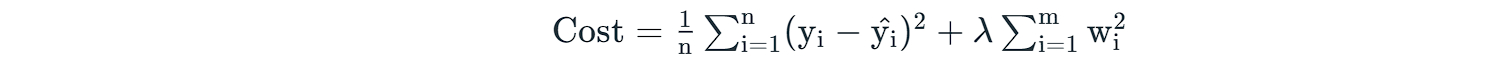

In Ridge regularization, the penalty term can approach zero but will not be zero as it squares the coefficient (slope). Ridge Regularization cannot be used in feature selection, so when to use LASSO and Ridge?
If you have many features with high correlation and you need to take away the useless features then LASSO is the better solution.
If the number of features greater than the number of observations and many features with multi-collinearity, Ridge regularization is a better solution.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [ ]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
X=data.data
y=data.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [ ]:
L.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [ ]:
y_pred=L.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [ ]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [ ]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [ ]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [ ]:
y_pred1=R.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


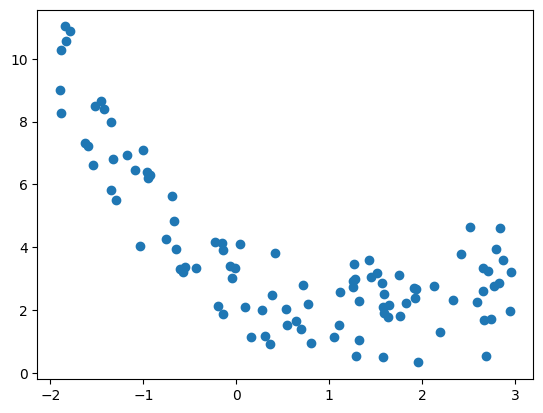

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

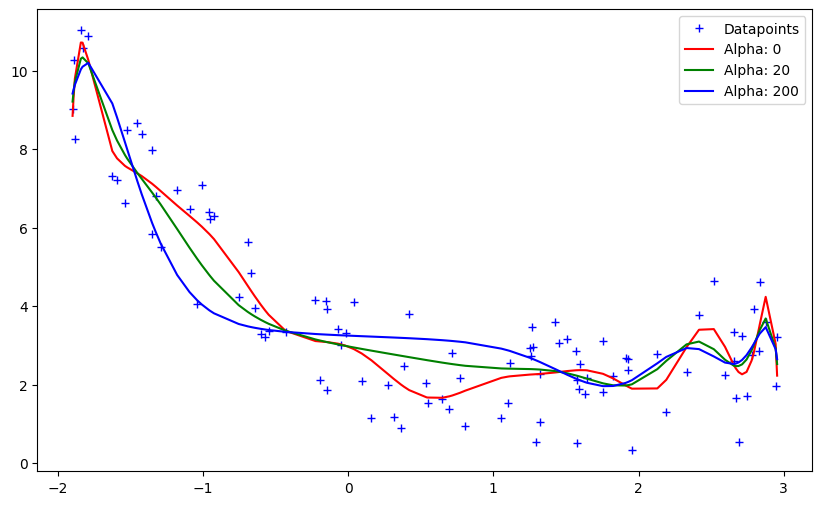

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

**Benefits of Regularization:**

- Regularization improves model generalization by reducing overfitting.        - Regularized models learn underlying patterns, while overfit models memorize noise in training data.
- Regularization techniques such as L1 (Lasso) L1 regularization simplifies models and improves interpretability by reducing coefficients of less important features to zero.
- Regularization improves model performance by preventing excessive weighting of outliers or irrelevant features.
- Regularization makes models stable across different subsets of the data. It reduces the sensitivity of model outputs to minor changes in the training set.
Regularization prevents models from becoming overly complex, which is especially important when dealing with limited data or noisy environments.
- Regularization can help handle multicollinearity (high correlation between features) by reducing the magnitudes of correlated coefficients.
- Regularization introduces hyperparameters (e.g., alpha or lambda) that control the strength of regularization. This allows fine-tuning models to achieve the right balance between bias and variance.
- Regularization promotes consistent model performance across different datasets. It reduces the risk of dramatic performance changes when encountering new data.